# PyTorch ToyProblem: Dog Type Classification with VGGNet - 2018.06.28

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
# Getting train & test dataset

transform = torchvision.transforms.Compose([
    transforms.RandomCrop(224),
    transforms.ToTensor()
])

rootdir = './data/imagenet/' # All data are from ImageNet: http://image-net.org/ 
train_dir = rootdir + 'train/' # Around 1000 data on each label
test_dir = rootdir + 'test/' # Around 200 data on each label

composer = [
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])    
]

train_dataset = torchvision.datasets.ImageFolder(
    train_dir,
    transforms.Compose(composer)
)

test_dataset = torchvision.datasets.ImageFolder(
    test_dir,
    transforms.Compose(composer)
)

batch_size = 20
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)

Label for image 1 = 2
Label for image 2 = 4
Label for image 3 = 1
Label for image 4 = 3
Label for image 5 = 1
Label for image 6 = 3
Label for image 7 = 0
Label for image 8 = 0
Label for image 9 = 1


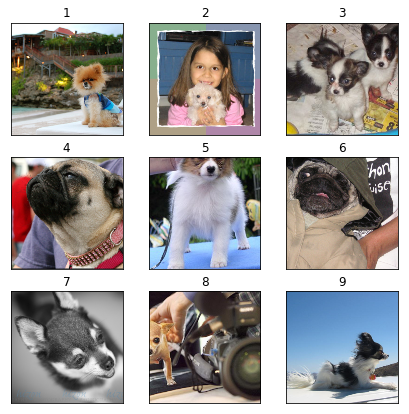

In [3]:
# Some simple visualization

plt.subplots(figsize=(7,7))
for i in range(9):
    pickup = np.random.randint(0,len(train_dataset))
    plt.subplot(3,3,i+1)
    plt.title(i+1)
    plt.xticks([])
    plt.yticks([])
    print("Label for image %d = %d" % (i+1, train_dataset[pickup][1]))
    plt.imshow(np.transpose(train_dataset[pickup][0] / 2 + 0.5, (1,2,0)))

In [4]:
# Device setup

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
# Defining VGGNet

net = torchvision.models.vgg11(pretrained=True)
net.fc = nn.Linear(512, 5) 
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [6]:
# Defining Loss function & Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005)

In [7]:
# Training (Validation will be added on next self-study iteration)

tqdm.monitor_interval = 0
epochs = 10
for epoch in tqdm(range(epochs)):
    print('Epoch %d' % epoch)
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print('%d data processed. loss = %f' % (i * batch_size, loss))
print('Finished training.')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0
0 data processed. loss = 16.689938
200 data processed. loss = 2.185469
400 data processed. loss = 1.864433
600 data processed. loss = 1.460900
800 data processed. loss = 1.505524
1000 data processed. loss = 0.971646
1200 data processed. loss = 1.123061
1400 data processed. loss = 1.429722
1600 data processed. loss = 1.364590
1800 data processed. loss = 0.885271
2000 data processed. loss = 1.007628
2200 data processed. loss = 0.947813
2400 data processed. loss = 0.743342
2600 data processed. loss = 0.670944
2800 data processed. loss = 0.915250
3000 data processed. loss = 0.885738
3200 data processed. loss = 0.874686
3400 data processed. loss = 1.100481
3600 data processed. loss = 0.926620
3800 data processed. loss = 0.573062
4000 data processed. loss = 0.170911
4200 data processed. loss = 0.554673
4400 data processed. loss = 0.437858
4600 data processed. loss = 0.401995
4800 data processed. loss = 0.599123
5000 data processed. loss = 0.432483
5200 data processed. loss = 0.530620

 10%|█         | 1/10 [00:53<08:02, 53.58s/it]

Epoch 1
0 data processed. loss = 0.891039
200 data processed. loss = 0.420511
400 data processed. loss = 0.080983
600 data processed. loss = 0.192074
800 data processed. loss = 0.633923
1000 data processed. loss = 0.472770
1200 data processed. loss = 0.305759
1400 data processed. loss = 0.763873
1600 data processed. loss = 0.133758
1800 data processed. loss = 0.462354
2000 data processed. loss = 0.099313
2200 data processed. loss = 0.447801
2400 data processed. loss = 0.112836
2600 data processed. loss = 0.787543
2800 data processed. loss = 0.141339
3000 data processed. loss = 0.439570
3200 data processed. loss = 0.116377
3400 data processed. loss = 0.413493
3600 data processed. loss = 0.265347
3800 data processed. loss = 0.276019
4000 data processed. loss = 0.355096
4200 data processed. loss = 0.115844
4400 data processed. loss = 0.131758
4600 data processed. loss = 0.155815
4800 data processed. loss = 0.101578
5000 data processed. loss = 0.593284
5200 data processed. loss = 0.301374


 20%|██        | 2/10 [01:47<07:09, 53.71s/it]

Epoch 2
0 data processed. loss = 0.331820
200 data processed. loss = 0.243417
400 data processed. loss = 0.244937
600 data processed. loss = 0.227980
800 data processed. loss = 0.110141
1000 data processed. loss = 0.308234
1200 data processed. loss = 0.099854
1400 data processed. loss = 0.124896
1600 data processed. loss = 0.194171
1800 data processed. loss = 0.435457
2000 data processed. loss = 0.077707
2200 data processed. loss = 0.429496
2400 data processed. loss = 0.165591
2600 data processed. loss = 0.388509
2800 data processed. loss = 0.272055
3000 data processed. loss = 0.117190
3200 data processed. loss = 0.172845
3400 data processed. loss = 0.623679
3600 data processed. loss = 0.389205
3800 data processed. loss = 0.141033
4000 data processed. loss = 0.138554
4200 data processed. loss = 0.124762
4400 data processed. loss = 0.412341
4600 data processed. loss = 0.178952
4800 data processed. loss = 0.123511
5000 data processed. loss = 0.492482
5200 data processed. loss = 0.161168


 30%|███       | 3/10 [02:41<06:16, 53.83s/it]

Epoch 3
0 data processed. loss = 0.140446
200 data processed. loss = 0.113691
400 data processed. loss = 0.099121
600 data processed. loss = 0.099619
800 data processed. loss = 0.229410
1000 data processed. loss = 0.040820
1200 data processed. loss = 0.034954
1400 data processed. loss = 0.032699
1600 data processed. loss = 0.047943
1800 data processed. loss = 0.011903
2000 data processed. loss = 0.517799
2200 data processed. loss = 0.062362
2400 data processed. loss = 0.125527
2600 data processed. loss = 0.070858
2800 data processed. loss = 0.054172
3000 data processed. loss = 0.309571
3200 data processed. loss = 0.410109
3400 data processed. loss = 0.033808
3600 data processed. loss = 0.052945
3800 data processed. loss = 0.299936
4000 data processed. loss = 0.028563
4200 data processed. loss = 0.363637
4400 data processed. loss = 0.125609
4600 data processed. loss = 0.034912
4800 data processed. loss = 0.063344
5000 data processed. loss = 0.020999
5200 data processed. loss = 0.176331


 40%|████      | 4/10 [03:35<05:23, 53.89s/it]

Epoch 4
0 data processed. loss = 0.034265
200 data processed. loss = 0.178651
400 data processed. loss = 0.316825
600 data processed. loss = 0.090985
800 data processed. loss = 0.197578
1000 data processed. loss = 0.132575
1200 data processed. loss = 0.018373
1400 data processed. loss = 0.035824
1600 data processed. loss = 0.110038
1800 data processed. loss = 0.032837
2000 data processed. loss = 0.096344
2200 data processed. loss = 0.197241
2400 data processed. loss = 0.033957
2600 data processed. loss = 0.039659
2800 data processed. loss = 0.041905
3000 data processed. loss = 0.185071
3200 data processed. loss = 0.039658
3400 data processed. loss = 0.080286
3600 data processed. loss = 0.015815
3800 data processed. loss = 0.288883
4000 data processed. loss = 0.068011
4200 data processed. loss = 0.080851
4400 data processed. loss = 0.106738
4600 data processed. loss = 0.244533
4800 data processed. loss = 0.259302
5000 data processed. loss = 0.104969
5200 data processed. loss = 0.397243


 50%|█████     | 5/10 [04:29<04:29, 53.93s/it]

Epoch 5
0 data processed. loss = 0.196200
200 data processed. loss = 0.100016
400 data processed. loss = 0.102325
600 data processed. loss = 0.078601
800 data processed. loss = 0.006855
1000 data processed. loss = 0.007399
1200 data processed. loss = 0.165951
1400 data processed. loss = 0.240637
1600 data processed. loss = 0.027855
1800 data processed. loss = 0.068104
2000 data processed. loss = 1.243538
2200 data processed. loss = 0.154810
2400 data processed. loss = 0.101441
2600 data processed. loss = 0.092816
2800 data processed. loss = 0.070944
3000 data processed. loss = 0.021690
3200 data processed. loss = 0.074718
3400 data processed. loss = 0.257088
3600 data processed. loss = 0.258802
3800 data processed. loss = 0.030882
4000 data processed. loss = 0.053307
4200 data processed. loss = 0.013558
4400 data processed. loss = 0.030192
4600 data processed. loss = 0.018672
4800 data processed. loss = 0.133644
5000 data processed. loss = 0.106720
5200 data processed. loss = 0.022334


 60%|██████    | 6/10 [05:23<03:35, 53.96s/it]

Epoch 6
0 data processed. loss = 0.010018
200 data processed. loss = 0.167964
400 data processed. loss = 0.150177
600 data processed. loss = 0.086416
800 data processed. loss = 0.050463
1000 data processed. loss = 0.218988
1200 data processed. loss = 0.201632
1400 data processed. loss = 0.049456
1600 data processed. loss = 0.009700
1800 data processed. loss = 0.023884
2000 data processed. loss = 0.073975
2200 data processed. loss = 0.007009
2400 data processed. loss = 0.025303
2600 data processed. loss = 0.022858
2800 data processed. loss = 0.098329
3000 data processed. loss = 0.232118
3200 data processed. loss = 0.017379
3400 data processed. loss = 0.106117
3600 data processed. loss = 0.041241
3800 data processed. loss = 0.131779
4000 data processed. loss = 0.041341
4200 data processed. loss = 0.044879
4400 data processed. loss = 0.007959
4600 data processed. loss = 0.031038
4800 data processed. loss = 0.038167
5000 data processed. loss = 0.171311
5200 data processed. loss = 0.353597


 70%|███████   | 7/10 [06:17<02:41, 53.99s/it]

Epoch 7
0 data processed. loss = 0.036048
200 data processed. loss = 0.174757
400 data processed. loss = 0.080970
600 data processed. loss = 0.063597
800 data processed. loss = 0.050124
1000 data processed. loss = 0.010362
1200 data processed. loss = 0.286885
1400 data processed. loss = 0.067052
1600 data processed. loss = 0.034208
1800 data processed. loss = 0.010735
2000 data processed. loss = 0.054590
2200 data processed. loss = 0.157929
2400 data processed. loss = 0.151315
2600 data processed. loss = 0.019610
2800 data processed. loss = 0.010067
3000 data processed. loss = 0.026010
3200 data processed. loss = 0.004253
3400 data processed. loss = 0.007388
3600 data processed. loss = 0.006723
3800 data processed. loss = 0.024165
4000 data processed. loss = 0.004559
4200 data processed. loss = 0.120350
4400 data processed. loss = 0.039464
4600 data processed. loss = 0.014354
4800 data processed. loss = 0.031265
5000 data processed. loss = 0.011519
5200 data processed. loss = 0.055333


 80%|████████  | 8/10 [07:12<01:48, 54.01s/it]

Epoch 8
0 data processed. loss = 0.009308
200 data processed. loss = 0.013024
400 data processed. loss = 0.002818
600 data processed. loss = 0.012651
800 data processed. loss = 0.015203
1000 data processed. loss = 0.005211
1200 data processed. loss = 0.032884
1400 data processed. loss = 0.014882
1600 data processed. loss = 0.005673
1800 data processed. loss = 0.005106
2000 data processed. loss = 0.089688
2200 data processed. loss = 0.010794
2400 data processed. loss = 0.005817
2600 data processed. loss = 0.002492
2800 data processed. loss = 0.019828
3000 data processed. loss = 0.012473
3200 data processed. loss = 0.009353
3400 data processed. loss = 0.170342
3600 data processed. loss = 0.040271
3800 data processed. loss = 0.015076
4000 data processed. loss = 0.030044
4200 data processed. loss = 0.024403
4400 data processed. loss = 0.014918
4600 data processed. loss = 0.009808
4800 data processed. loss = 0.008740
5000 data processed. loss = 0.030930
5200 data processed. loss = 0.021160


 90%|█████████ | 9/10 [08:06<00:54, 54.03s/it]

Epoch 9
0 data processed. loss = 0.005075
200 data processed. loss = 0.014325
400 data processed. loss = 0.141413
600 data processed. loss = 0.037239
800 data processed. loss = 0.008969
1000 data processed. loss = 0.007039
1200 data processed. loss = 0.028716
1400 data processed. loss = 0.008471
1600 data processed. loss = 0.101174
1800 data processed. loss = 0.015528
2000 data processed. loss = 0.078677
2200 data processed. loss = 0.041386
2400 data processed. loss = 0.060115
2600 data processed. loss = 0.106228
2800 data processed. loss = 0.053158
3000 data processed. loss = 0.076727
3200 data processed. loss = 0.008538
3400 data processed. loss = 0.001576
3600 data processed. loss = 0.015556
3800 data processed. loss = 0.055805
4000 data processed. loss = 0.062457
4200 data processed. loss = 0.026575
4400 data processed. loss = 0.120198
4600 data processed. loss = 0.035656
4800 data processed. loss = 0.443917
5000 data processed. loss = 0.014810
5200 data processed. loss = 0.002821


100%|██████████| 10/10 [09:00<00:00, 54.05s/it]

Finished training.


In [8]:
# Testing

net.eval()
correct = 0
total = 0
with torch.no_grad():
    for i, data in tqdm(enumerate(test_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
        
print('Accuracy for the test images: %d %%' % (100 * correct / total))

57it [00:03, 17.54it/s]

Accuracy for the test images: 93 %
